<a href="https://colab.research.google.com/github/seismosmsr/hawaii_soils/blob/main/BPCA_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages(c('data.table','ggplot2','magrittr','rstatix','plotrix','ggsignif'))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘Rcpp’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘corrplot’, ‘car’




In [4]:
library(data.table)
library(ggplot2)
library(magrittr)
library(rstatix)
library(ggsignif)
library(plotrix)

In [6]:
bpca_dt <- fread('/content/BPCA_HPLC_LF.csv')
standards_dt <- fread('/content/BPCA6_standards.csv')
LF_stoic_dt <- fread('/content/Postfire Soils BPCA - LF_subset.csv')

In [7]:
bpca_dt$Burn_severity[is.na(bpca_dt$Burn_severity)] <- 'blank'

In [8]:
bpca_dt[,Depth := factor(Depth, levels= c('0-5','5-10','10-20','10-30','20-30','blank'))]

Warning message:
“Removed 5 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 5 rows containing missing values (`geom_point()`).”


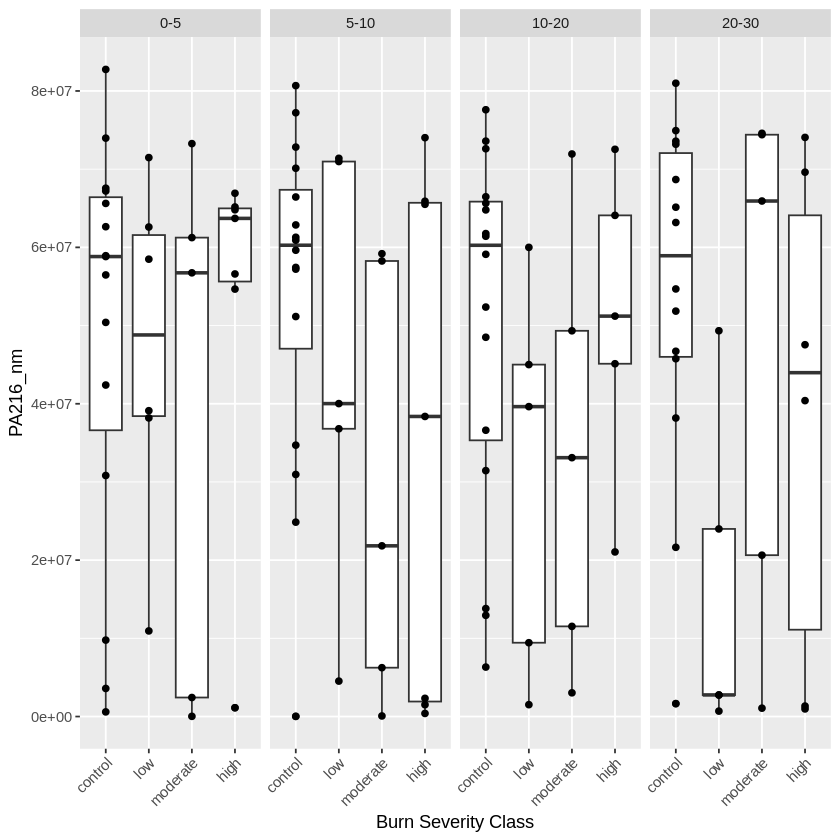

In [9]:
bpca_dt[!is.na(`Burn_severity`) &
        Burn_severity != 'blank'  &
        Depth != '10-30' ] %>%

ggplot(aes(x = factor(Burn_severity,
        level=c('control', 'low', 'moderate','high')),
        y = PA216_nm)) +
    geom_boxplot( ) +
    geom_point()+
    facet_grid(.~Depth) +
    # ylim(0,1000000)+
    xlab('Burn Severity Class') +
        theme(axis.text.x = element_text(angle = 45, hjust=1))

Warning message:
“Removed 5 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 5 rows containing missing values (`geom_point()`).”


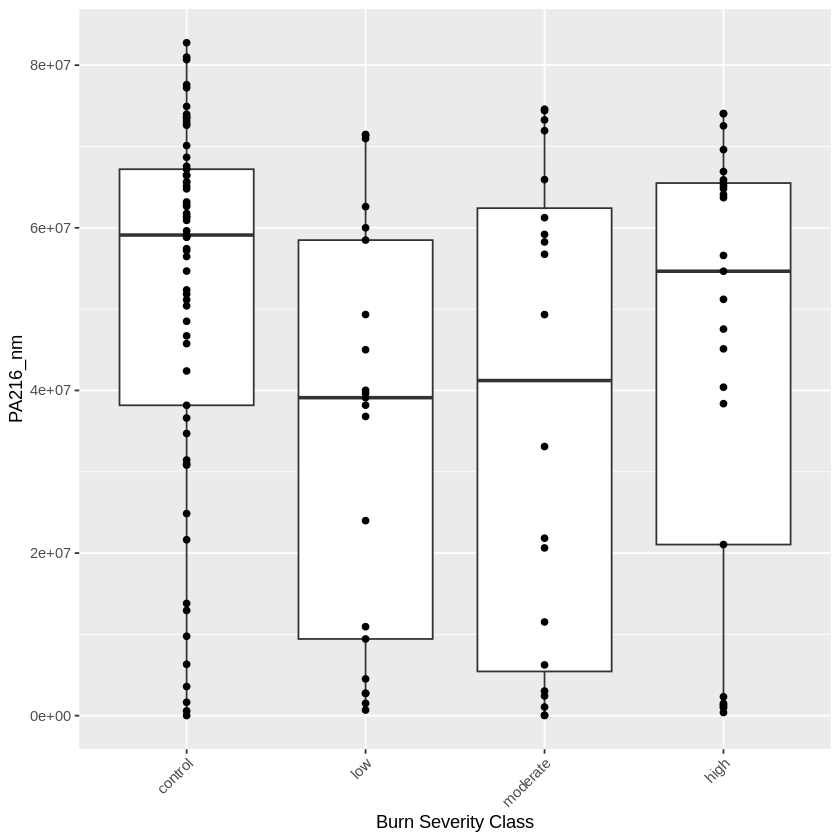

In [10]:
bpca_dt[!is.na(`Burn_severity`) &
        Burn_severity != 'blank'  &
        Depth != '10-30' ] %>%

ggplot(aes(x = factor(Burn_severity,
        level=c('control', 'low', 'moderate','high')),
        y = PA216_nm)) +
    geom_boxplot( ) +
    geom_point()+
    # facet_grid(.~.) +
    # ylim(0,1000000)+
    xlab('Burn Severity Class') +
        theme(axis.text.x = element_text(angle = 45, hjust=1))

Warning message:
“Removed 5 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 5 rows containing missing values (`geom_point()`).”


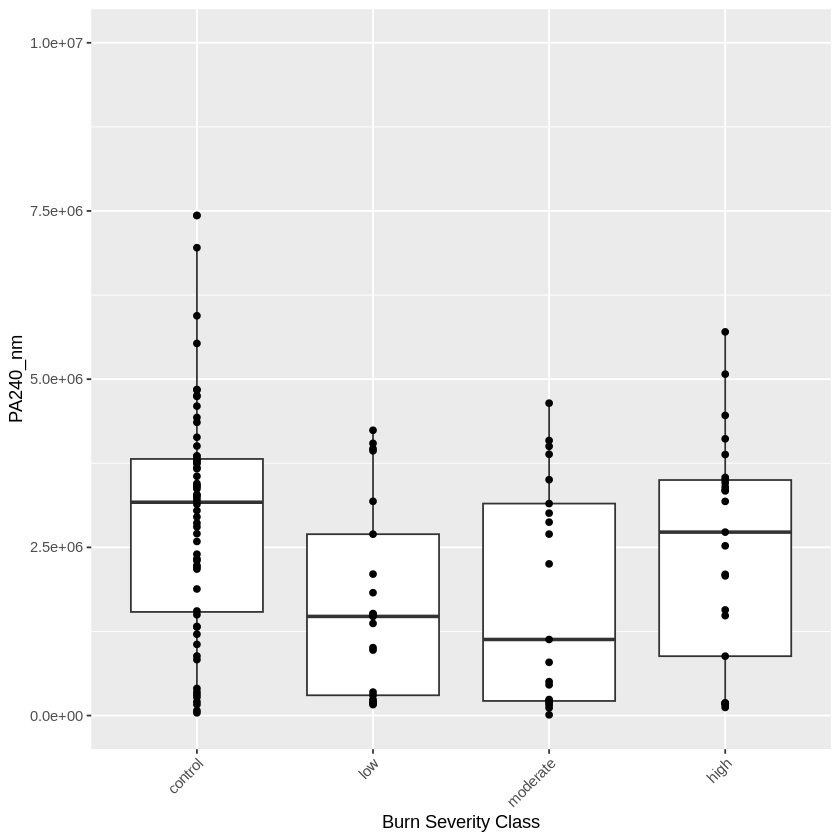

In [11]:
bpca_dt[!is.na(`Burn_severity`) &
        Burn_severity != 'blank'  &
        Depth != '10-30' ] %>%

ggplot(aes(x = factor(Burn_severity,
        level=c('control', 'low', 'moderate','high')),
        y = PA240_nm)) +
    geom_boxplot( ) +
    geom_point()+
    # geom_smooth(method = 'lm')+
    # facet_grid(.~.) +
     ylim(0,10000000)+
#   geom_smooth(method = 'lm')+
    xlab('Burn Severity Class') +
        theme(axis.text.x = element_text(angle = 45, hjust=1))


In [28]:
lm('PA_216_nm~stock_concentration_mg_per_ml',standards_dt) %>% summary

lm('PA_240_nm~stock_concentration_mg_per_ml',standards_dt) %>% summary


Call:
lm(formula = "PA_216_nm~stock_concentration_mg_per_ml", data = standards_dt)

Residuals:
      1       2       3       4       5       6       7 
-409598 -436504 -411398 -225306  114244 1516592 -148031 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     506468     319253   1.586    0.174    
stock_concentration_mg_per_ml 57637932    1260376  45.731 9.44e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 763300 on 5 degrees of freedom
Multiple R-squared:  0.9976,	Adjusted R-squared:  0.9971 
F-statistic:  2091 on 1 and 5 DF,  p-value: 9.441e-08



Call:
lm(formula = "PA_240_nm~stock_concentration_mg_per_ml", data = standards_dt)

Residuals:
      1       2       3       4       5       6       7 
-276957 -288961 -269299 -149606   41962 1044209 -101349 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     302124     217927   1.386    0.224    
stock_concentration_mg_per_ml 25776316     860353  29.960 7.77e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 521100 on 5 degrees of freedom
Multiple R-squared:  0.9945,	Adjusted R-squared:  0.9934 
F-statistic: 897.6 on 1 and 5 DF,  p-value: 7.77e-07


In [59]:
standards_dt %>% head
# lm('stock_concentration_mg_per_ml~PA_216_nm',standards_dt) %>% summary
conc_240_lm <- lm('stock_concentration_mg_per_ml~PA_240_nm',standards_dt)
conc_216_lm <- lm('stock_concentration_mg_per_ml~PA_216_nm',standards_dt)

Stds,PA_216_nm,PA_240_nm,stock_concentration_mg_per_ml,conc_240,conc_216
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>
1:800,144902,46647,0.000833333,-0.009255619,-0.005999420
1:400,166027,56123,0.001666667,-0.008890032,-0.005633782
1:200,287197,118746,0.003333333,-0.006474011,-0.003536535
1:100,665415,324360,0.006666667,0.001458659,0.003009777
1:50,1389218,687770,0.013333333,0.015479161,0.015537579
1:10,5865589,3064754,0.066666667,0.107184150,0.093015970


In [16]:
bpca_dt[,PA_240_nm:=PA240_nm]
bpca_dt[,PA_216_nm:=PA216_nm]

In [57]:
bpca_dt[,conc_240 := predict(conc_240_lm,data.frame(PA_240_nm=PA_240_nm))]
bpca_dt[,conc_216 := predict(conc_216_lm,data.frame(PA_216_nm=PA_216_nm))]

In [49]:
standards_dt[,conc_240 := predict(conc_240_lm,data.frame(PA_240_nm=PA_240_nm))]
standards_dt[,conc_216 := predict(conc_216_lm,data.frame(PA_216_nm=PA_216_nm))]

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 2 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”


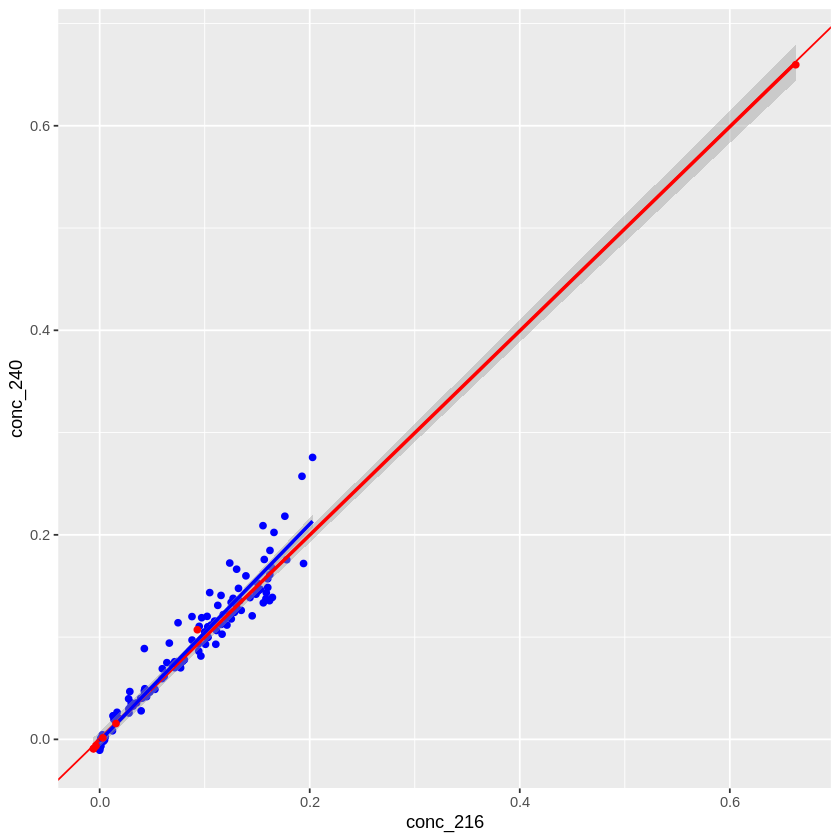

In [81]:
# bpca_dt %>%
# bpca_dt[conc_240>.8,conc_240:=NA]
# bpca_dt[conc_240<.8] %>%
  # standards_dt %>% print
standards_dt %>%
# ggplot(aes(x=PA_216_nm,y=PA_240_nm)) +
ggplot(aes(x=conc_216,y=conc_240)) +

# coord_trans(y="log10",x="log10")+
geom_point(data= bpca_dt[conc_240<.8],aes(x=  (conc_216^2)/10,y=conc_240),color='blue')+
geom_abline(color='red')+
geom_smooth(method='lm',color='red')+
geom_smooth(data= bpca_dt[conc_240<.8],aes(x=  (conc_216^2)/10,y=conc_240),color='blue',method = 'lm')+

geom_point(color='red')

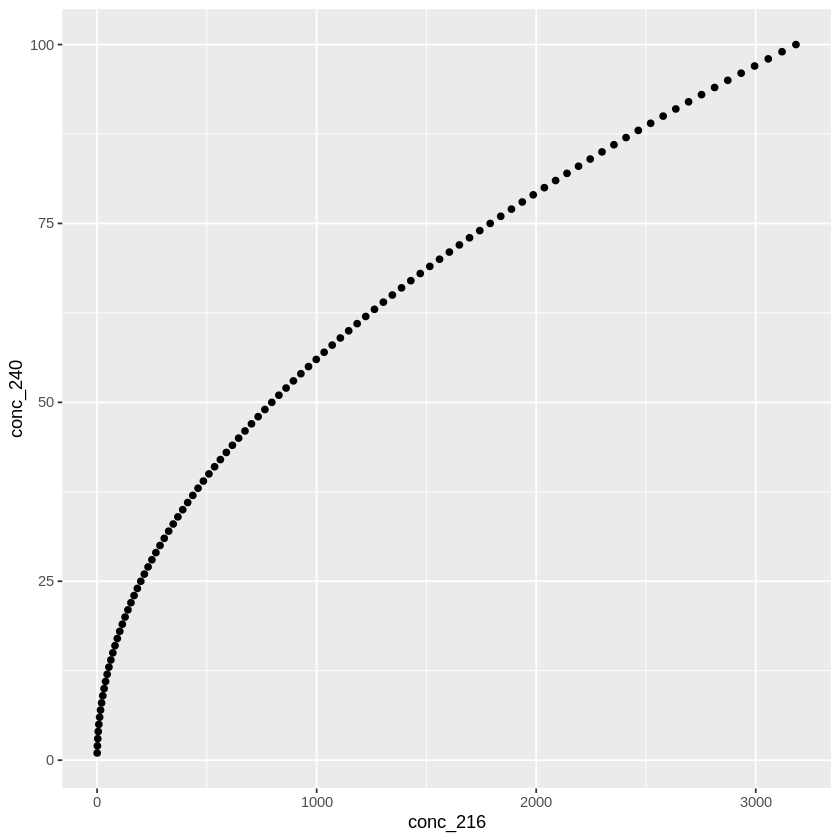

In [82]:
test_dt <- data.table(conc_240= 1:100)
test_dt$conc_216 <- (test_dt$conc_240^2)/pi
# [conc_216 :=conc_240^2*pi]

test_dt %>%
ggplot(aes(y=conc_240,x=conc_216)) +
geom_point()

Warning message:
“Removed 7 rows containing missing values (`geom_point()`).”


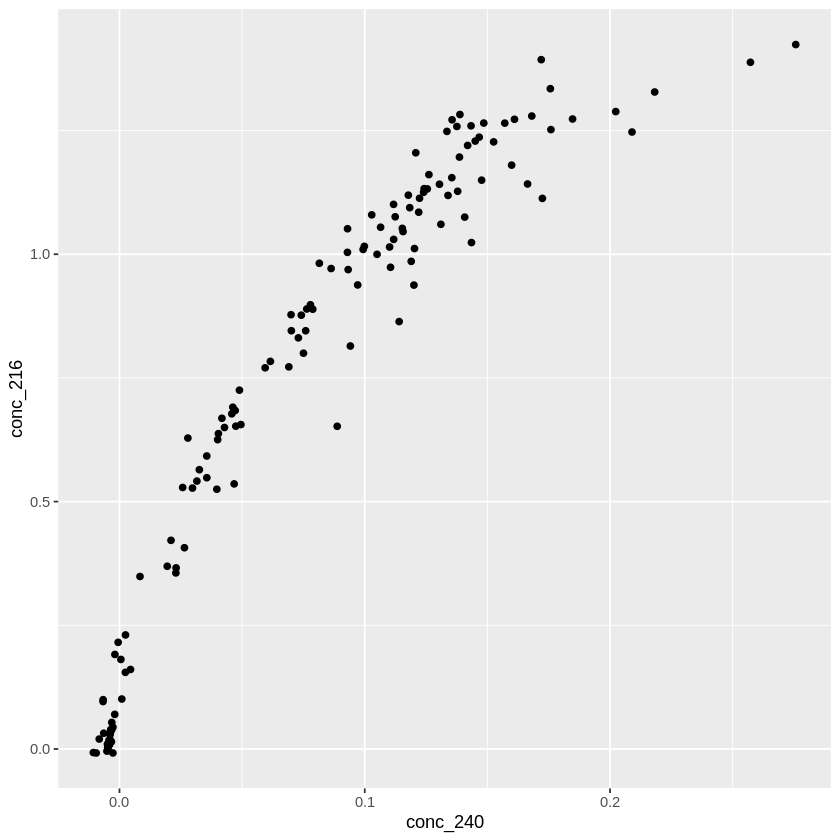

In [18]:
bpca_dt[conc_240>.8,conc_240:=NA]
bpca_dt %>%
ggplot(aes(x=conc_240,y=conc_216)) +
geom_point()

In [83]:
# bpca_dt$conc_240[]
LF_stoic_dt$conc_216 <-  bpca_dt$conc_216[match(paste0(LF_stoic_dt$Depth,LF_stoic_dt$Site),paste0(bpca_dt$Depth,bpca_dt$Site))]

LF_stoic_dt$conc_240 <-  bpca_dt$conc_240[match(paste0(LF_stoic_dt$Depth,LF_stoic_dt$Site),paste0(bpca_dt$Depth,bpca_dt$Site))]

LF_stoic_dt$Burn_severity <-  bpca_dt$Burn_severity[match(paste0(LF_stoic_dt$Depth,LF_stoic_dt$Site),paste0(bpca_dt$Depth,bpca_dt$Site))]

Warning message:
“Removed 13 rows containing non-finite values (`stat_boxplot()`).”


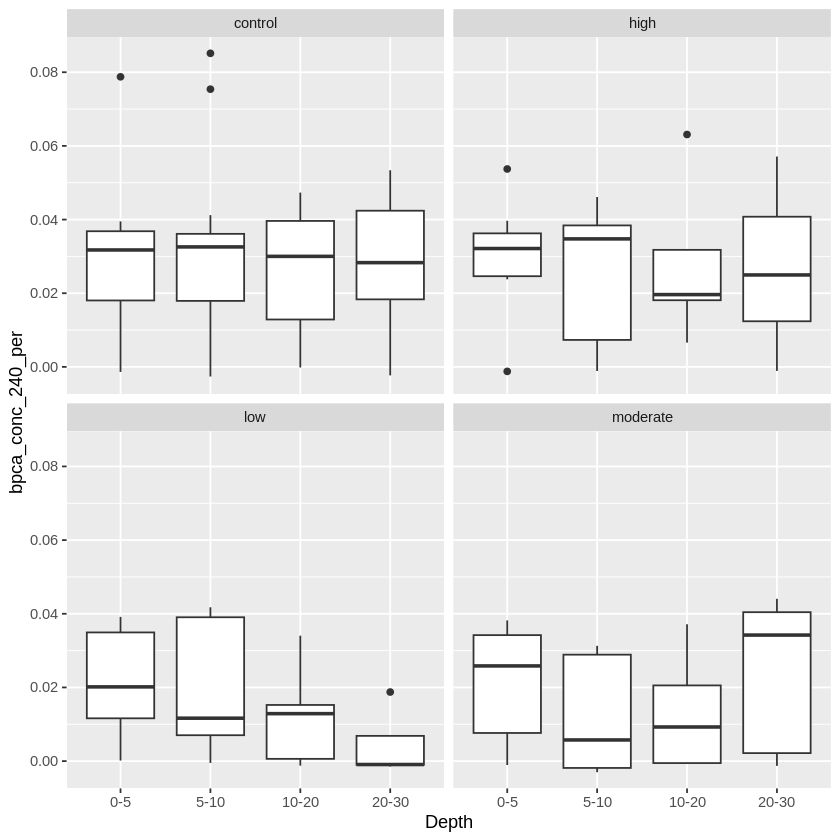

In [86]:
#(fractionation_mass_recovered_g/starting_fract_mass_soil_g)*
# *(C/100)
LF_stoic_dt[,Depth := factor(Depth, levels = c('0-5','5-10','10-20','20-30'))]
LF_stoic_dt[,bpca_conc_240 := conc_240/bpca_starting_mass_mg]
LF_stoic_dt[,bpca_conc_216 := conc_216/bpca_starting_mass_mg]

LF_stoic_dt[,bpca_conc_216_per := conc_216/bpca_starting_mass_mg]
LF_stoic_dt[,bpca_conc_240_per := conc_240/bpca_starting_mass_mg]


LF_stoic_dt[conc_240<.8][Depth !='10-30'][,Depth := factor(Depth, levels = c('0-5','5-10','10-20','20-30'))] %>%
ggplot(aes(y=bpca_conc_240_per,x=Depth))+
    geom_boxplot(aes(group=Depth))+
    facet_wrap(.~Burn_severity)


# LF_stoic_dt[Depth !='10-30'][,Depth := factor(Depth, levels = c('0-5','5-10','10-20','20-30'))] %>%
# ggplot(aes(x = factor(Burn_severity,
#         level=c('control', 'low', 'moderate','high')),
#         y = conc_216/bpca_starting_mass_mg)) +
#     geom_boxplot( ) +
#     geom_point()+
#     facet_grid(.~Depth) +
#     # ylim(0,1000000)+
#     xlab('Burn Severity Class') +
#         theme(axis.text.x = element_text(angle = 45, hjust=1))


In [87]:
# anova_dt <- LF_stoic_dt[!is.na(conc_240)& !is.na(Depth)]
# res.aov <- anova_dt %>% anova_test(conc_240 ~ Burn_severity+Depth,data=.)
# res.aov %>% summary


combo_grid <- expand.grid(c(1),c(1:4))

combo_grid<- 1:nrow(combo_grid) %>% lapply(function(x){combo_grid[x,] %>% unlist})

# ggplot(LF_stoic_dt, aes(x = Burn_severity, y = conc_240/bpca_starting_mass_mg)*(C/100)*1000))) +
#   geom_boxplot() +
#   scale_x_discrete() + xlab("Group") +
#   ylab("Scores") +
#   geom_signif(comparisons = combo_grid,
#           map_signif_level=TRUE)+
#   facet_wrap(.~Depth)

In [128]:
LF_stoic_dt <- LF_stoic_dt[conc_240 <.8]

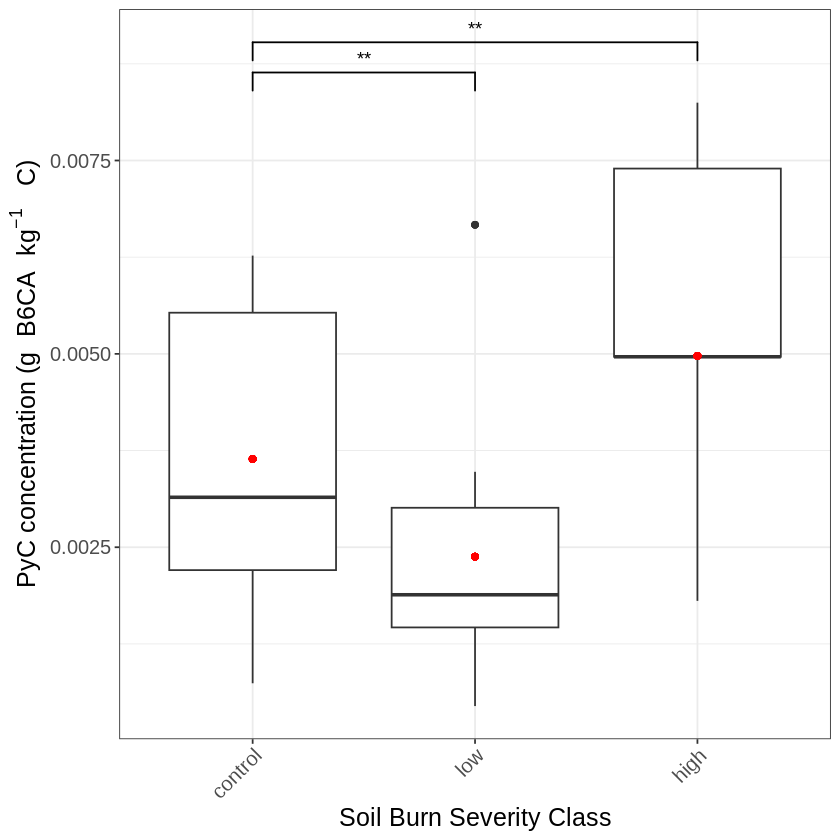

In [160]:
LF_stoic_dt[,g_kg := (conc_240/bpca_starting_mass_mg)*(fractionation_mass_recovered_g/starting_fract_mass_soil_g)*(C/100) ]
LF_stoic_dt[,site_total:= sum(g_kg,na.rm=T),by=c('Site')]
LF_stoic_dt[,group_mean:= mean(site_total,na.rm=T),by=c('Burn_severity')]
# LF_stoic_dt[,site_total:= mean(g_kg,na.rm=T),by=c('Site')]

LF_stoic_dt[Depth !='10-30'][,Depth := factor(Depth, levels = c('0-5','5-10','10-20','20-30'),labels = c('0-5 cm','5-10 cm','10-20 cm','20-30 cm'))]
LF_stoic_dt[ ][,Burn_severity := factor(Burn_severity,levels=c('control', 'low', 'moderate','high'))]
LF_stoic_dt$Burn_severity[LF_stoic_dt$Burn_severity == 'moderate'] <- 'low'
LF_stoic_dt[,Burn_severity := factor(Burn_severity %>% paste,levels=c('control', 'low' ,'high'))]

LF_stoic_dt[!is.na(conc_240)&g_kg>0&g_kg<20 &site_total <20] %>%

 ggplot(aes(x = Burn_severity, y = site_total)) +
    geom_boxplot() +
    geom_point(aes(y=group_mean),color='red')+
    #(bquote('Mean light fraction soil carbon content ('*mg~ 'C' ~g^-1~'soil'*')'))
    ylab(bquote('PyC concentration ('*g~ 'B6CA'~kg^-1~' C'*')'))+
    xlab('Soil Burn Severity Class') +
        theme_bw()+
        theme(text = element_text(size=15),axis.text.x = element_text(angle = 45, hjust=1)) +
    geom_signif(aes(),comparisons = list(c(1,2),c(1,3)),
              map_signif_level=TRUE,step_increase=.05) +
    # facet_grid(.~Depth) +
    coord_cartesian(expand=TRUE)

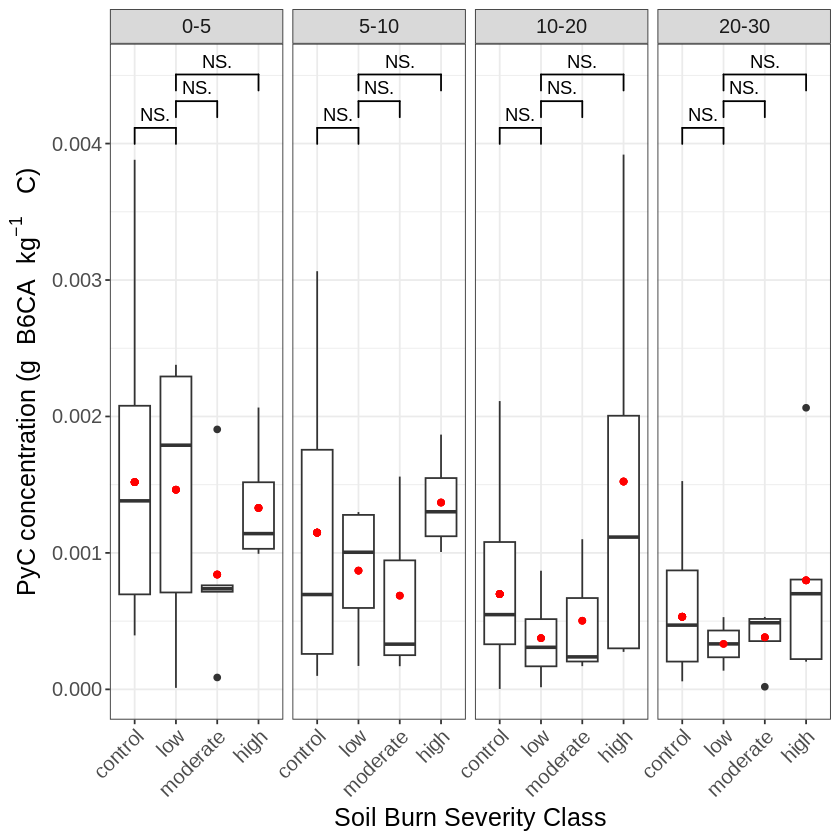

In [133]:
LF_stoic_dt[,g_kg := (conc_240/bpca_starting_mass_mg)*(fractionation_mass_recovered_g/starting_fract_mass_soil_g)*(C/100) ]
LF_stoic_dt[,group_mean:= mean(g_kg,na.rm=T),by=c('Depth','Burn_severity')]

LF_stoic_dt[Depth !='10-30'][,Depth := factor(Depth, levels = c('0-5','5-10','10-20','20-30'),labels = c('0-5 cm','5-10 cm','10-20 cm','20-30 cm'))]
LF_stoic_dt[ ][,Burn_severity := factor(Burn_severity,levels=c('control', 'low', 'moderate','high'))]

LF_stoic_dt[!is.na(conc_240)&g_kg>0&g_kg<20][,group_mean:= mean(g_kg,na.rm=T),by=c('Depth','Burn_severity')] %>%

 ggplot(aes(x = Burn_severity, y = g_kg)) +
    geom_boxplot() +
    geom_point(aes(y=group_mean),color='red')+
    #(bquote('Mean light fraction soil carbon content ('*mg~ 'C' ~g^-1~'soil'*')'))
    ylab(bquote('PyC concentration ('*g~ 'B6CA'~kg^-1~' C'*')'))+
    xlab('Soil Burn Severity Class') +
        theme_bw()+
        theme(text = element_text(size=15),axis.text.x = element_text(angle = 45, hjust=1)) +
    geom_signif(aes(),comparisons = list(c(2,1),c(2,3),c(2,4)),
              map_signif_level=TRUE,step_increase=.05) +
    facet_grid(.~Depth) +
    coord_cartesian(expand=TRUE)